In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("webmd.csv")

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Basic details of dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [5]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
data.shape

(362806, 12)

# Exploratory Data Analysis

In [7]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [8]:
data.Reviews.nunique()

250167

In [9]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [10]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [11]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [12]:
data.apply(lambda x: len(x.unique()))

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250168
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [13]:
# check for categorical attributes

cat_col = []
for x in data:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [14]:
data.Drug.nunique()

7093

In [15]:
#unique number of side effects.
data.Sides.nunique()

1651

In [16]:
data.Drug.mode()
#cymbalta is the most occuring drug

0    cymbalta
Name: Drug, dtype: object

In [17]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [19]:
data.shape

(362806, 12)

In [20]:
data.Sides.nunique()

1651

In [21]:
data['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [22]:
data['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [23]:
data['UsefulCount'].unique()

array([  0,   1,   3,  10,   5,   4,   2,   7,   6,  12,  15,   9,  14,
        13,  18,  29,  17,   8,  30,  20,  16,  25,  19,  11,  23,  38,
        44,  34,  35,  21,  42,  28,  36,  40,  60,  48,  61,  50,  43,
        26,  22,  41,  54,  24,  33,  27,  45,  59,  75,  77,  66,  31,
        47,  32,  90,  84,  39,  55, 137,  53,  56,  65,  46,  37,  74,
        49,  63,  57,  71,  51,  67, 105,  58,  62,  52,  70, 113,  83,
       140,  88, 100, 107,  79,  96,  72,  97,  64,  87,  76,  68, 131,
       101,  69, 108, 154,  81, 109, 112,  82, 136,  80, 117, 103,  86,
        73,  92, 133,  85, 119, 141, 123,  78,  89,  91, 135, 110, 169,
       176, 178, 126,  94, 127,  99, 104, 255,  98, 106, 134, 121, 111,
       102, 114, 120, 156, 222, 129, 166, 142, 125, 115,  93, 132, 122,
       128, 188, 145, 116,  95], dtype=int64)

In [24]:
data['Date'].nunique()

4524

In [25]:
data['EaseofUse'].value_counts()

5     192650
4      74732
3      41303
1      35927
2      18191
6          2
10         1
Name: EaseofUse, dtype: int64

In [26]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Finding missing values

In [27]:
data['Age'].value_counts()
#there is a blank space ,so we can fill it with a value 3-6
# change the value 07 - Dec to 7-12

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [28]:
data['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)

In [29]:
data['Age'].replace(to_replace = ['07-Dec'], value = '7-12', inplace = True)

In [30]:
data['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
3-6           13040
13-18          7045
7-12           1644
0-2             497
Name: Age, dtype: int64

In [31]:
data["Sex"].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [32]:
#check for duplicated rows
duplicates=data[data.duplicated()]
print("Duplicate rows:\n",duplicates)

Duplicate rows:
                Age                                          Condition  \
12102        55-64                                High Blood Pressure   
17120        55-64                                High Blood Pressure   
21816   75 or over                                              Other   
22427        35-44                   Abnormally Long or Heavy Periods   
24302        25-34    Fungal Infection of Fingernails - Onychomycosis   
...            ...                                                ...   
339647       55-64                                     Diverticulitis   
339648       55-64                                     Diverticulitis   
343090       25-34                                 Excessive Sweating   
343390       25-34                                 Excessive Sweating   
353563       55-64  Drying and Inflammation of Cornea and Conjunct...   

              Date                                          Drug  DrugId  \
12102    5/22/2013            

In [33]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [34]:
#to remove duplicated rows
data.drop_duplicates(inplace=True)

In [35]:
#again check for any duplicated rows present
duplicates=data[data.duplicated()]
duplicates

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


# Univariate analysis

Histogram

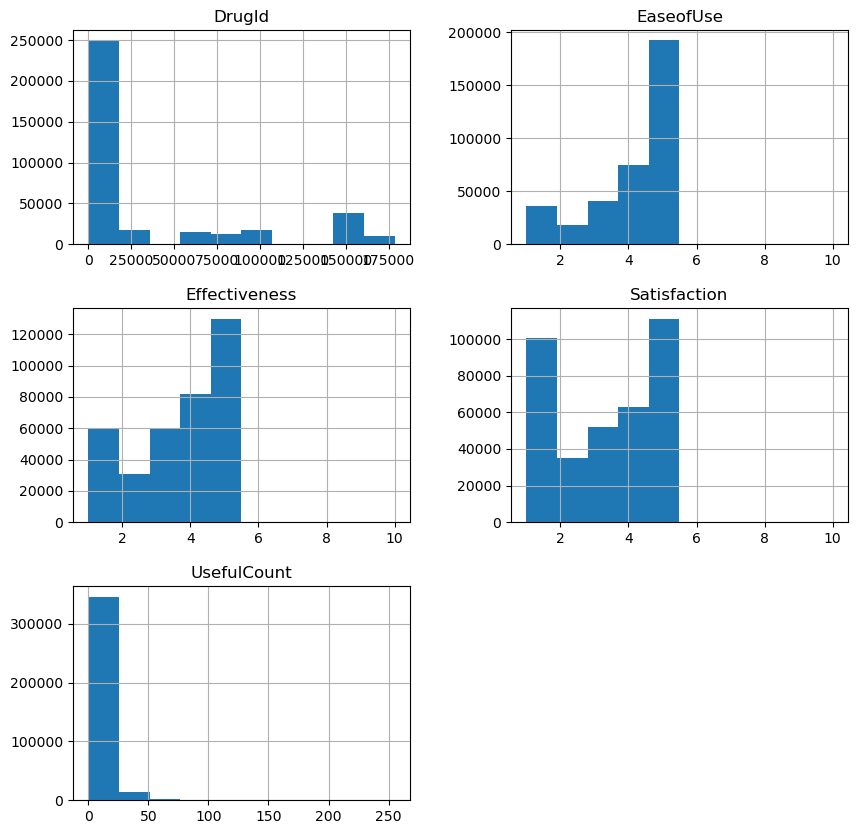

In [36]:
freqgraph=data.select_dtypes(include=['int','float'])
freqgraph.hist(figsize=(10,10))
plt.show()

Boxplot

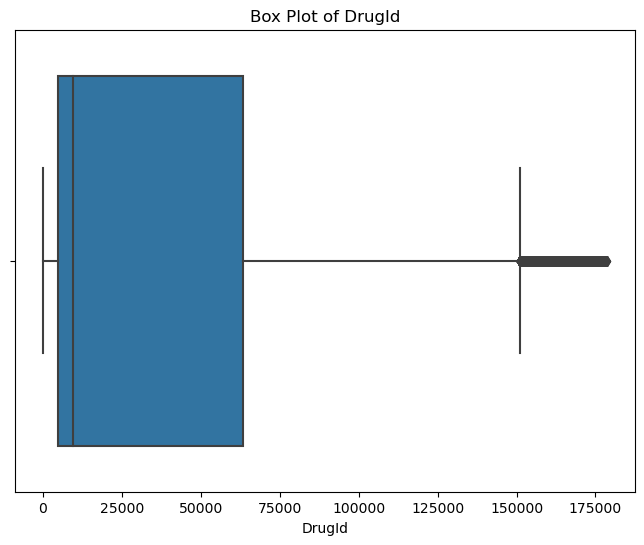

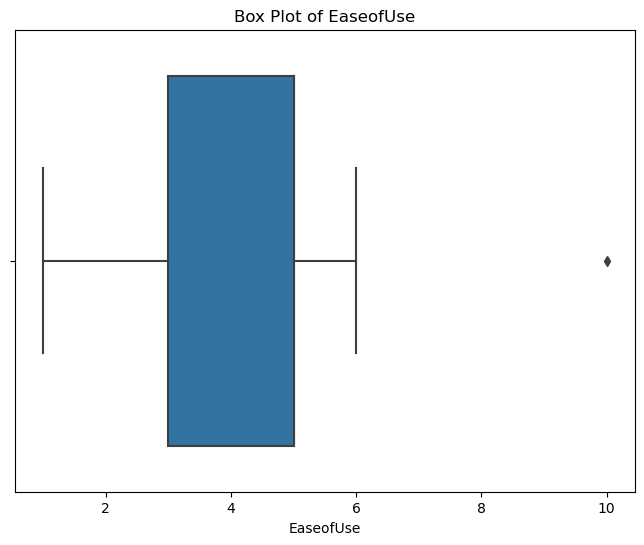

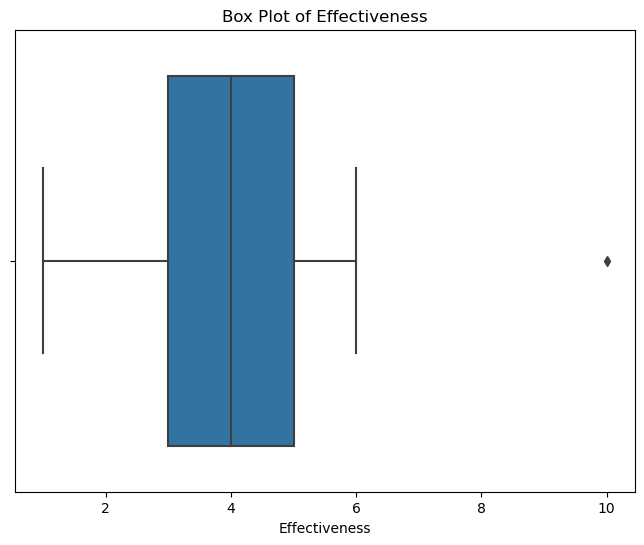

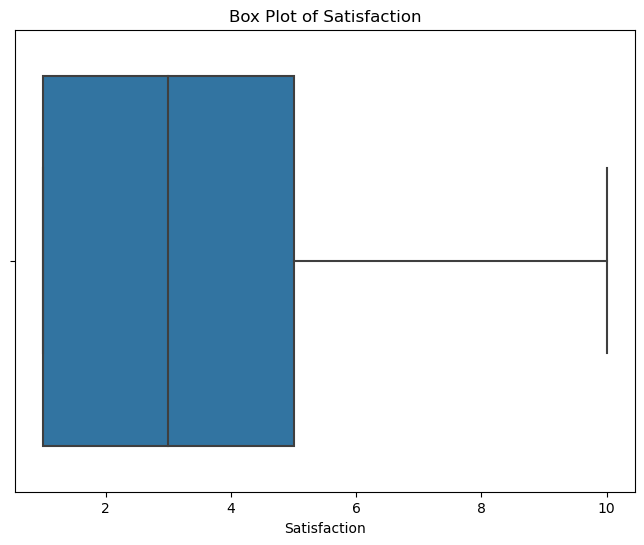

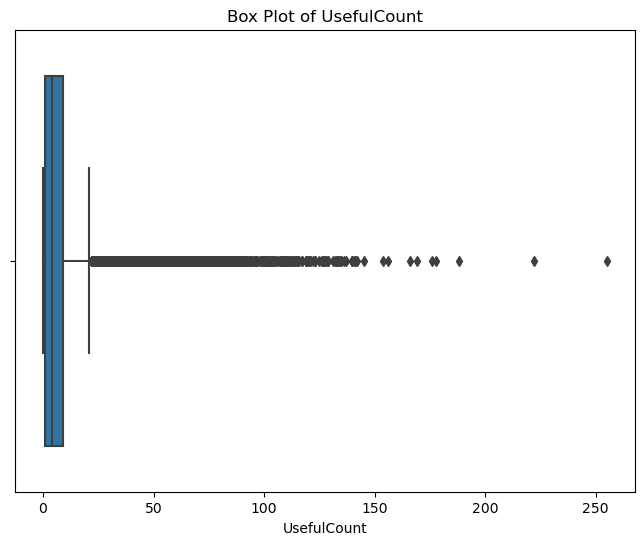

In [37]:
# Select numeric columns for box plots
numeric_columns =data.select_dtypes(include=['float64','int64']).columns
# Plot box plot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column].dropna())
    plt.title('Box Plot of ' + column)
    plt.xlabel(column)
    plt.show()

KDE (Kernel Distribution Estimation Plot) Plot

plt.figure(figsize=(8,6))
plt.subplot(3,2,1)
sns.kdeplot(x='DrugId',data=data,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='EaseofUse',data=data,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Effectiveness',data=data,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Satisfaction',data=data,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='UsefulCount',data=data,palette='Set2')

Count Plots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '75 or over'),
  Text(1, 0, '25-34'),
  Text(2, 0, '65-74'),
  Text(3, 0, '35-44'),
  Text(4, 0, '55-64'),
  Text(5, 0, '45-54'),
  Text(6, 0, '19-24'),
  Text(7, 0, '3-6'),
  Text(8, 0, '13-18'),
  Text(9, 0, '7-12'),
  Text(10, 0, '0-2')])

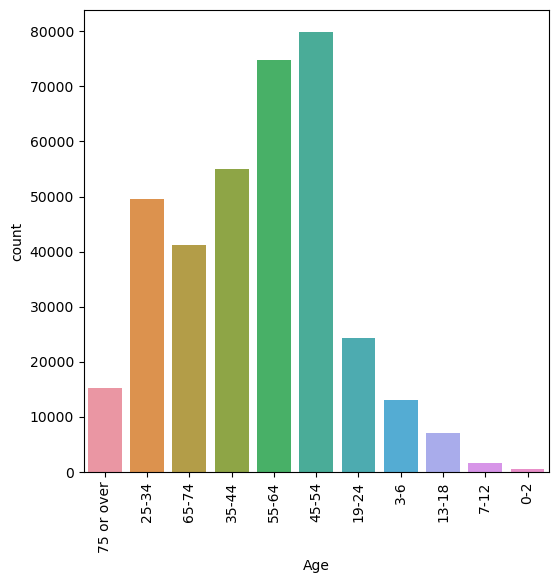

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(x='Age', data=data)
plt.xticks(rotation=90)

<Axes: xlabel='Satisfaction', ylabel='count'>

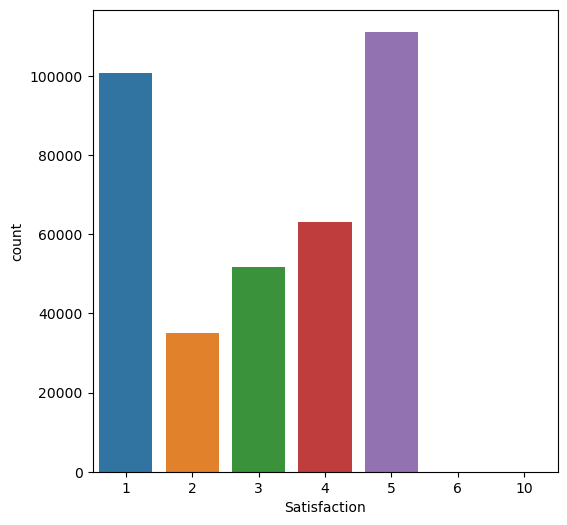

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(x='Satisfaction', data=data)

<Axes: xlabel='Sex', ylabel='count'>

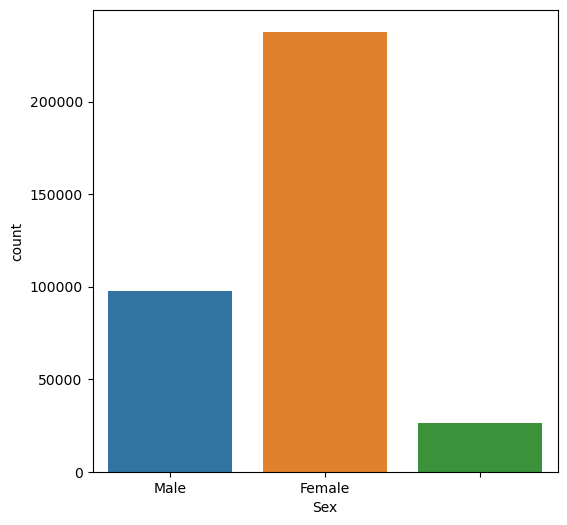

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=data)

<Axes: xlabel='Effectiveness', ylabel='count'>

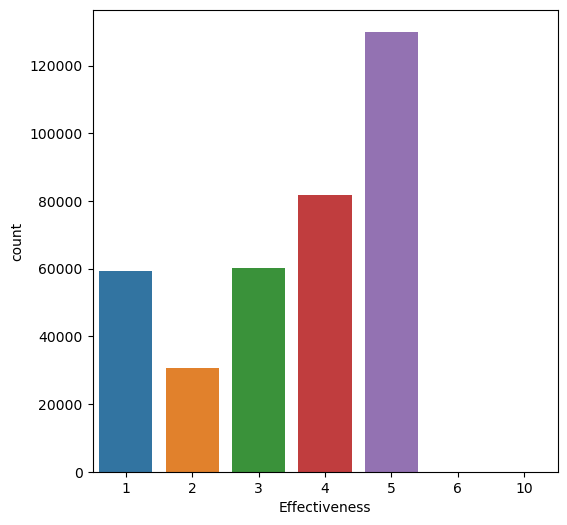

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(x='Effectiveness', data=data)

Pie chart for categorical data

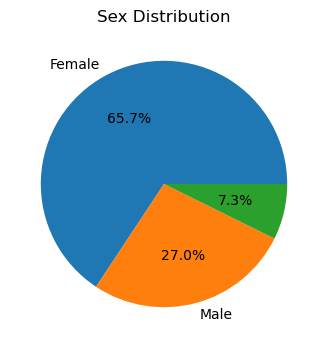

In [42]:
# Count the occurrences of each sex
sex_counts = data['Sex'].value_counts()

# Create a pie chart for the sex distribution
plt.figure(figsize=(8, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

# Bivariate analysis

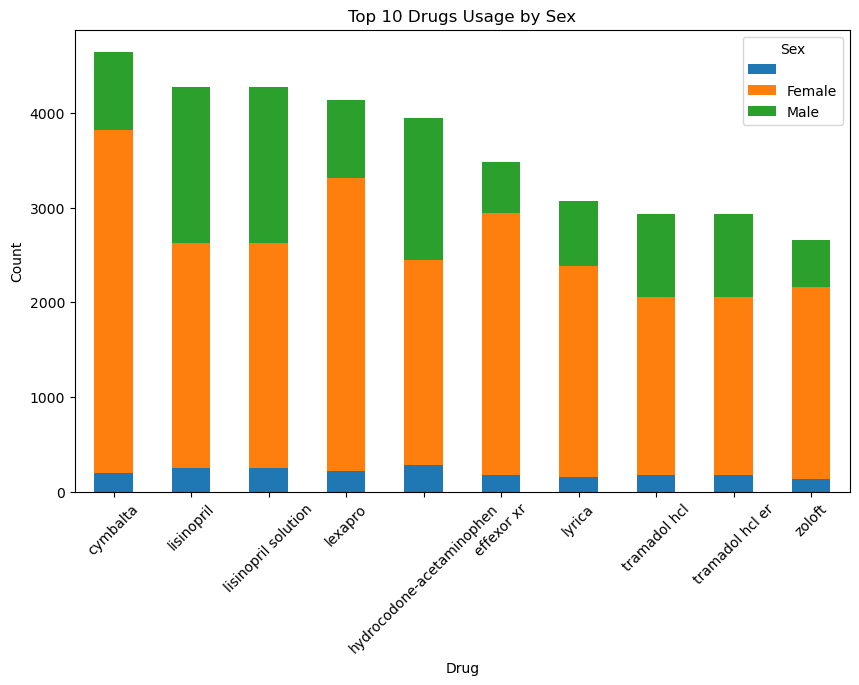

In [43]:
drug_counts = data['Drug'].value_counts().nlargest(10)
drug_sex_counts = data.groupby(['Drug', 'Sex']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Drugs Usage by Sex')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=45)
plt.show()

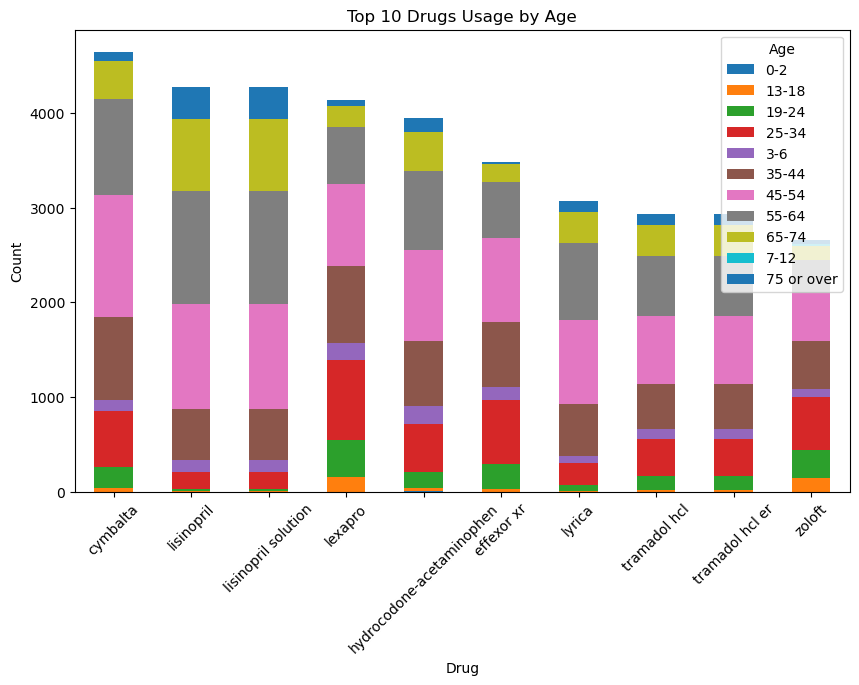

In [44]:
drug_counts = data['Drug'].value_counts().nlargest(10)
drug_sex_counts = data.groupby(['Drug', 'Age']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Drugs Usage by Age')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Age', loc='upper right')
plt.xticks(rotation=45)
plt.show()

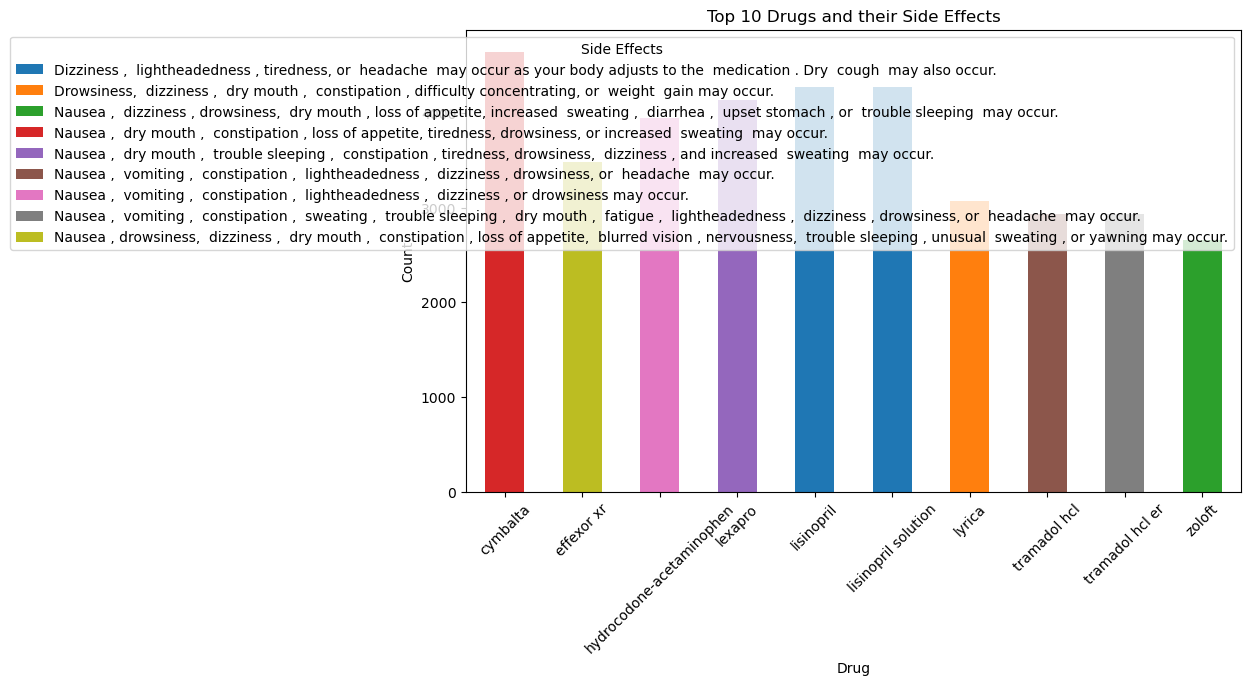

In [45]:
drug_counts = data['Drug'].value_counts().nlargest(10)
top_drugs_data = data[data['Drug'].isin(drug_counts.index)]
drug_side_counts = top_drugs_data.groupby(['Drug', 'Sides']).size().unstack()
drug_side_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Drugs and their Side Effects')
plt.xlabel('Drug')
plt.ylabel('Count')

plt.legend(title='Side Effects', loc='upper right')
plt.xticks(rotation=45)

plt.show()

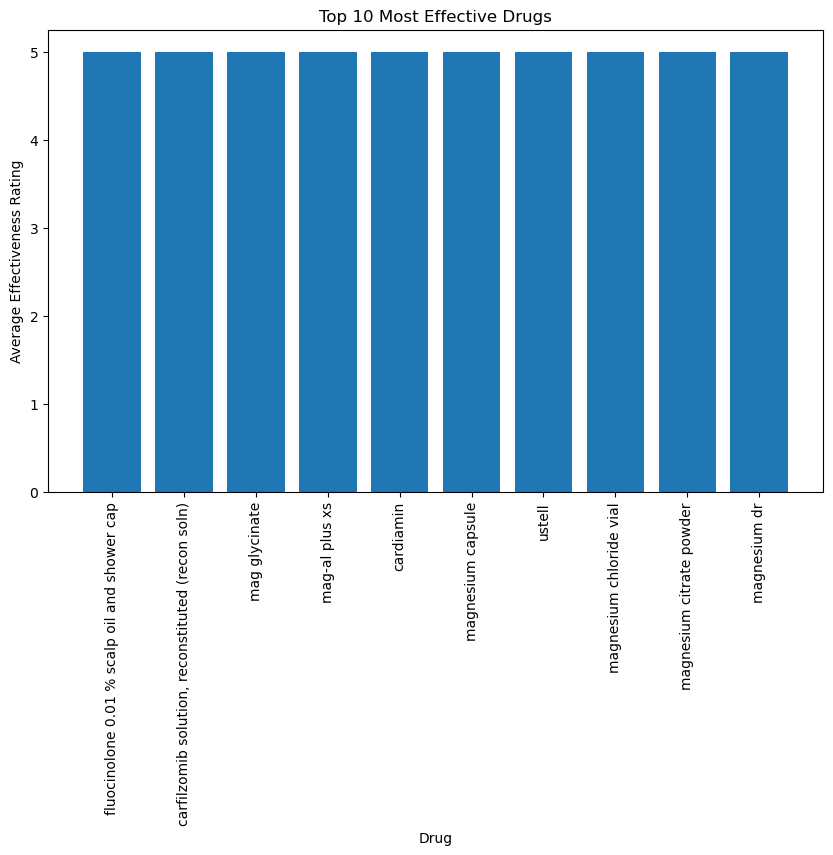

In [46]:
# Group the data by 'Drug' and calculate the average effectiveness rating for each drug
drug_effectiveness = data.groupby('Drug')['Effectiveness'].mean().sort_values(ascending=False)

# Get the top 10 most effective drugs
top_10_drugs = drug_effectiveness.head(10)

# Plot a bar chart to visualize the effectiveness ratings of the top 10 drugs
plt.figure(figsize=(10, 6))
plt.bar(top_10_drugs.index, top_10_drugs.values)

plt.title('Top 10 Most Effective Drugs')
plt.xlabel('Drug')
plt.ylabel('Average Effectiveness Rating')

plt.xticks(rotation=90)

plt.show()

# Multivariate analysis

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
DrugId,1.000000,-0.019881,-0.011821,-0.036457,0.011104
EaseofUse,-0.019881,1.000000,0.552332,0.563784,0.028080
Effectiveness,-0.011821,0.552332,1.000000,0.793096,0.047670
Satisfaction,-0.036457,0.563784,0.793096,1.000000,0.018293
UsefulCount,0.011104,0.028080,0.047670,0.018293,1.000000


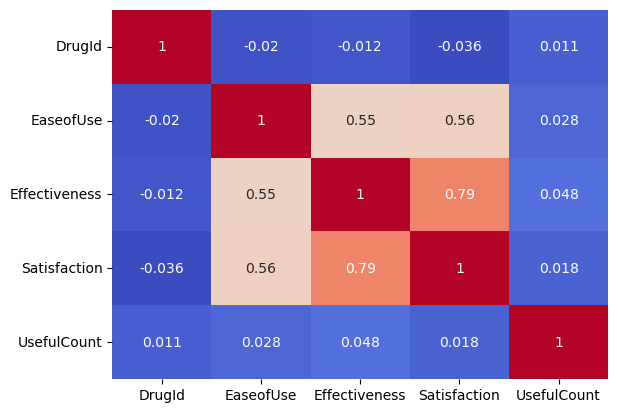

In [47]:
# Heatmap
corr=data.corr()
sns.heatmap(corr,annot=True,cbar=False,cmap= 'coolwarm')
corr

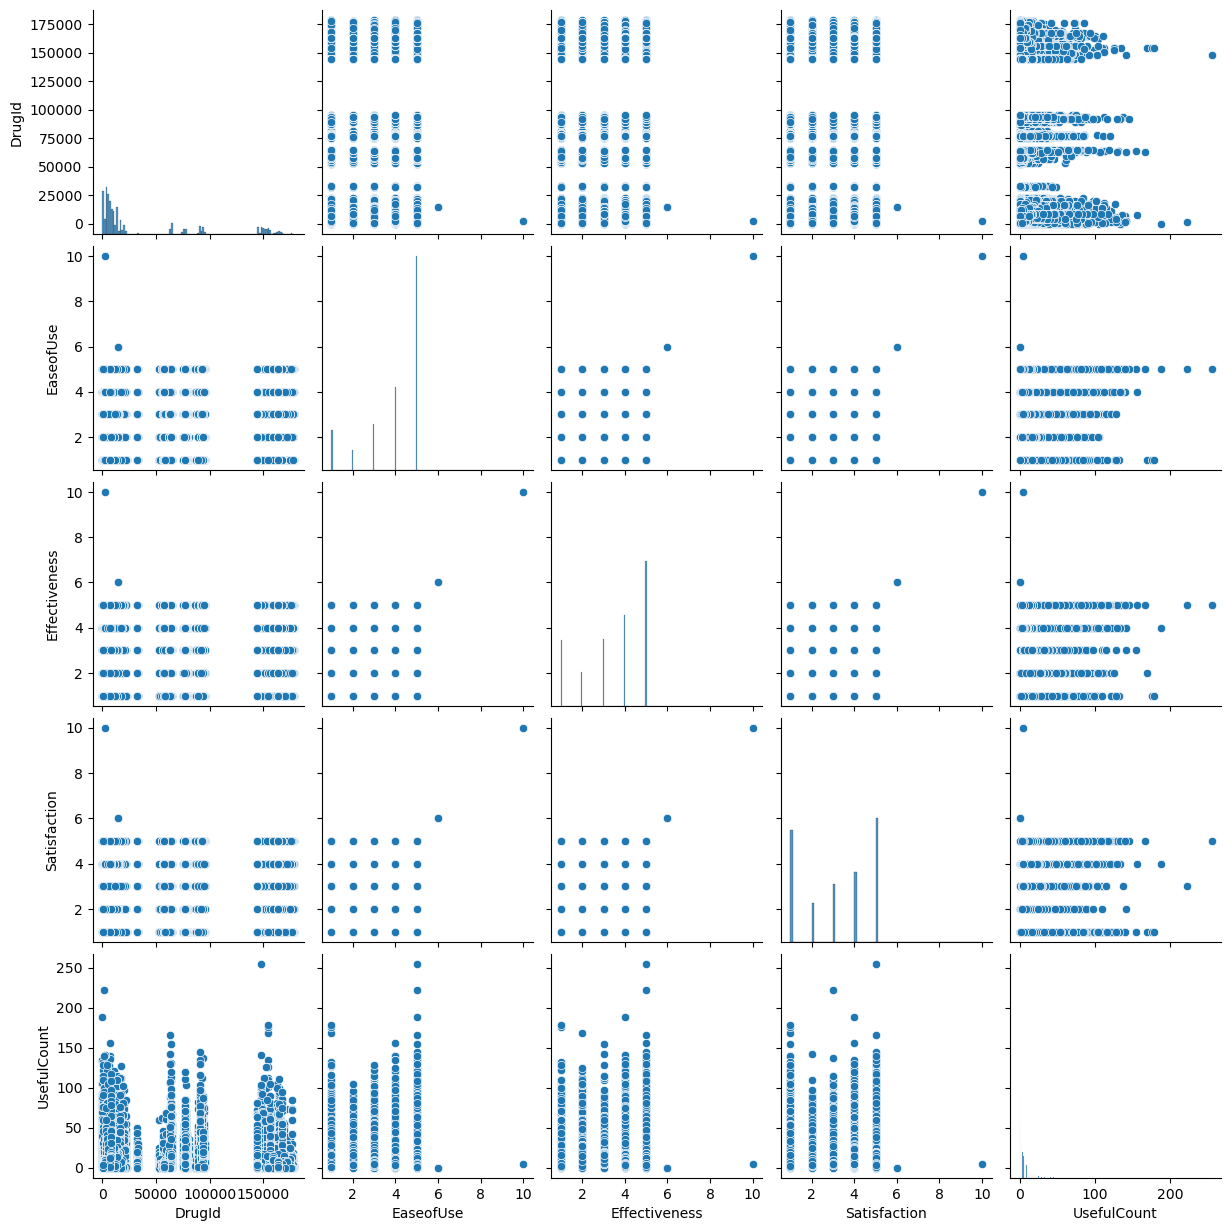

In [48]:
#Pair Plot
sns.pairplot(data)

In [49]:
data['Drug'].value_counts().head(20)

cymbalta                                               4646
lisinopril                                             4268
lisinopril solution                                    4268
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl                                           2931
tramadol hcl er                                        2931
zoloft                                                 2662
prednisone                                             2576
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax capsule, sprinkle               

Selection of drug: A particular drug named Topamax with DrugId 14494 is selected in building a classification model to determine side effects

In [50]:
drug_topamax= data.loc[(data['Drug'] =='topamax')]
drug_topamax.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,45-54,Migraine Prevention,9/22/2019,topamax,14494,4,4,"I was on this drug for 5 years, 100mg for the ...",1,,"Tiredness, drowsiness, dizziness , loss of co...",5
191575,35-44,Simple Partial Seizures,9/2/2019,topamax,14494,4,4,I have partial seizures. It didn't help for a ...,4,,"Tiredness, drowsiness, dizziness , loss of co...",0
191582,13-18,Migraine Prevention,8/9/2019,topamax,14494,1,1,I have been having migraines and headaches eve...,1,,"Tiredness, drowsiness, dizziness , loss of co...",6
191589,65-74,Essential Tremor,7/21/2019,topamax,14494,4,4,This is the only medication I have taken for t...,3,,"Tiredness, drowsiness, dizziness , loss of co...",0
191596,45-54,Migraine Prevention,4/30/2019,topamax,14494,5,5,I suffered from debilitating Cluster Headaches...,5,,"Tiredness, drowsiness, dizziness , loss of co...",2


In [51]:
drug_topamax.shape

(2148, 12)

In [52]:
drug_topamax['Condition'].value_counts()

Migraine Prevention                                1380
Other                                               460
Simple Partial Seizures                              68
Convulsive Seizures                                  63
Tonic-Clonic Epilepsy                                48
Additional Medication to Treat Partial Seizures      48
Habit of Drinking Too Much Alcohol                   27
Essential Tremor                                     24
Additional Medication for Tonic-Clonic Epilepsy      15
Involuntary Quivering                                10
Epilepsy of the Lennox Gastaut Syndrome               4
Binge Eating Disorder                                 1
Name: Condition, dtype: int64

In [53]:
drug_topamax['Condition'].value_counts().sum()

2148

In [54]:
data_new = drug_topamax.copy()

In [55]:
data_copy = data.copy()

# Data pre-processing

1. Handling whitespaces

In [56]:
# Handling instances with whitespaces
for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [57]:
data_new.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,45-54,Migraine Prevention,9/22/2019,topamax,14494.0,4.0,4.0,"I was on this drug for 5 years, 100mg for the ...",1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",5.0
191575,35-44,Simple Partial Seizures,9/2/2019,topamax,14494.0,4.0,4.0,I have partial seizures. It didn't help for a ...,4.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191582,13-18,Migraine Prevention,8/9/2019,topamax,14494.0,1.0,1.0,I have been having migraines and headaches eve...,1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",6.0
191589,65-74,Essential Tremor,7/21/2019,topamax,14494.0,4.0,4.0,This is the only medication I have taken for t...,3.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191596,45-54,Migraine Prevention,4/30/2019,topamax,14494.0,5.0,5.0,I suffered from debilitating Cluster Headaches...,5.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",2.0


2. Missing values

In [58]:
#checking missing values
data_new.isnull().sum()

Age                0
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          200
Satisfaction       0
Sex              103
Sides              0
UsefulCount        0
dtype: int64

In [59]:
data_new.shape

(2148, 12)

Bar plot showing the null value count of each feature

Text(0.5, 1.0, 'Total Missing Values')

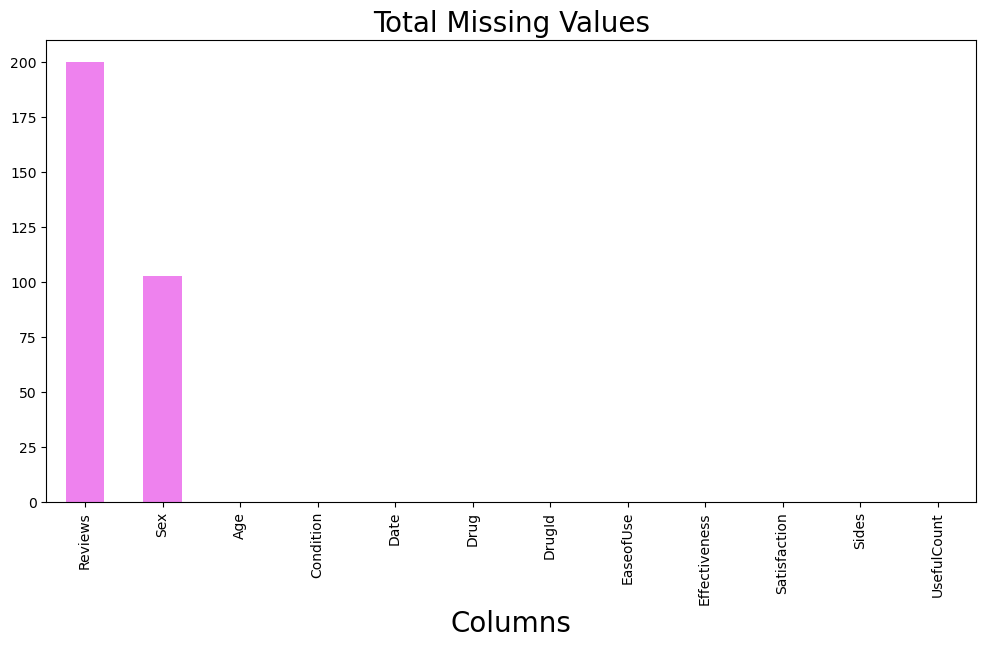

In [60]:
missing = (data_new.isnull().sum()).sort_values(ascending=False)
missing.plot(kind="bar", figsize = (12,6), fontsize = 10, color='violet')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [61]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

In [62]:
data_new.isnull().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [63]:
data_new.shape

(1861, 12)

3.Text processing

In [64]:

# converting rows having data other than string datatype into  string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Sides']) != str:
        data_new.iloc[i]['Sides'] = str(data_new.iloc[i]['Sides'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Reviews']) != str:
        data_new.iloc[i]['Reviews'] = str(data_new.iloc[i]['Reviews'])
        
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Condition']) != str:
        data_new.iloc[i]['Condition'] = str(data_new.iloc[i]['Condition'])

In [65]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

3.1 Sides

In [66]:
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

191610    tiredness drowsiness dizziness loss coordinati...
191624    tiredness drowsiness dizziness loss coordinati...
191631    tiredness drowsiness dizziness loss coordinati...
191638    tiredness drowsiness dizziness loss coordinati...
191645    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
197204    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1861, dtype: object

In [67]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Sides'] = data_new['Sides'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
data_new['Sides']

191610    tiredness drowsiness dizziness loss coordinati...
191624    tiredness drowsiness dizziness loss coordinati...
191631    tiredness drowsiness dizziness loss coordinati...
191638    tiredness drowsiness dizziness loss coordinati...
191645    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
197204    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1861, dtype: object

3.2 Reviews

In [69]:
data_new.review= data_new.Reviews.apply(cleaning_text)
data_new.review

191610    years when this medication when mild seizure n...
191624    topamax chronic vomiting only took weeks befor...
191631    taking gabapentin central neuropathy wondering...
191638    have been taking topamax exactly four years mi...
191645    suffer with spinal degeneration that supposed ...
                                ...                        
197200    first weeks felt great took ptsd symptoms away...
197201    have tried just about everything there help wi...
197202    have rash around neck after started taking top...
197203    have read some reviews happy realize that goin...
197204    topamax worked great until started have short ...
Name: Reviews, Length: 1861, dtype: object

# Removing stopwords

In [70]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Reviews'] = data_new['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
data_new['Reviews']

191610    I'm 30 years old, I 12 I put medication. When ...
191624    I put 50mg day topamax chronic vomiting. I too...
191631    I'm taking Gabapentin Central Neuropathy!! I w...
191638    I taking Topamax exactly four years migraine p...
191645    I suffer spinal degeneration I supposed daily ...
                                ...                        
197200    The first 3 weeks I felt great---it took lot P...
197201    I tried everything help migrianes. Nothing wor...
197202    I rash around neck I started taking Topamax. I...
197203    I read reviews happy realize "I" going crazy a...
197204    Topamax worked great, I started short term mem...
Name: Reviews, Length: 1861, dtype: object

3.3 Condition

In [72]:
data_new.Condition=data_new.Condition.apply(cleaning_text)
data_new.Condition

191610    simple partial seizures
191624                      other
191631                      other
191638        migraine prevention
191645                      other
                   ...           
197200                      other
197201        migraine prevention
197202                      other
197203    simple partial seizures
197204        migraine prevention
Name: Condition, Length: 1861, dtype: object

# 4. Gender

In [73]:
data_new['Sex'].value_counts()

Female    1696
Male       165
Name: Sex, dtype: int64

# 5.Handling age group

In [74]:
data_new['Age'].value_counts()

45-54         463
35-44         455
25-34         423
55-64         196
19-24         184
13-18          51
65-74          37
3-6            34
7-12            8
75 or over      8
0-2             2
Name: Age, dtype: int64

In [75]:
data_new['Age'].unique()

array(['7-12', '25-34', '45-54', '65-74', '55-64', '35-44', '3-6',
       '19-24', '13-18', '75 or over', '0-2'], dtype=object)

In [76]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [77]:
data_new['Age'].value_counts()

45-54     463
35-44     455
25-34     423
55-64     196
19-24     184
13-18      51
65-74      37
3-6        34
7-12        8
75-100      8
0-2         2
Name: Age, dtype: int64

# 6.Outliers detection

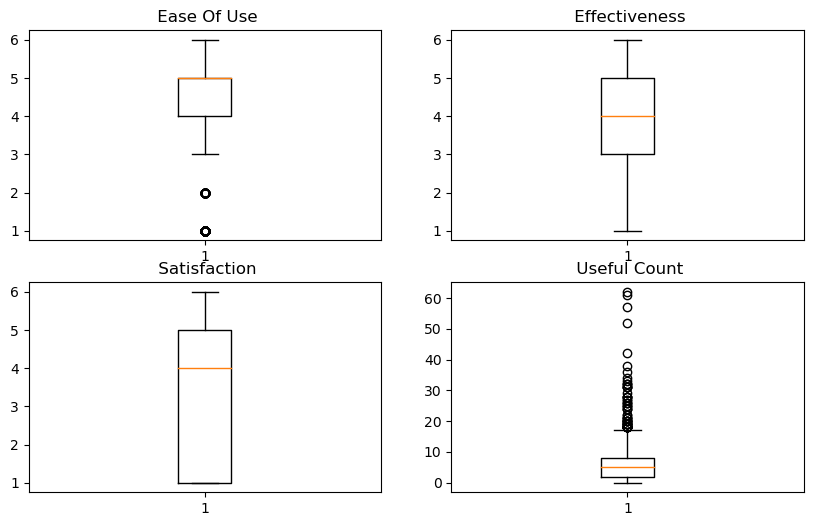

In [78]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

Insight:

Outliers are present in EaseofUse and UsefulCount columns.

# Removing outliers

In [79]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [80]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount', 'EaseofUse']:
    index_list.extend(outliers(data_new,feature))
index_list

[191785,
 191911,
 191925,
 191939,
 192009,
 192016,
 192023,
 192030,
 192058,
 192275,
 192317,
 192492,
 192888,
 193037,
 193082,
 193238,
 193286,
 193316,
 193319,
 193337,
 193340,
 193472,
 193502,
 193505,
 193508,
 193520,
 193535,
 193571,
 194130,
 194146,
 194264,
 194282,
 194300,
 194336,
 194344,
 194390,
 194496,
 194740,
 194818,
 194890,
 194914,
 194946,
 195358,
 195382,
 195420,
 195448,
 195494,
 195526,
 195940,
 195988,
 196040,
 196076,
 196134,
 196162,
 196340,
 196400,
 196410,
 196510,
 196756,
 196774,
 197000,
 197184,
 197188,
 197198,
 191624,
 191631,
 191757,
 191862,
 191911,
 191939,
 192128,
 192135,
 192142,
 192163,
 192219,
 192226,
 192289,
 192303,
 192317,
 192324,
 192457,
 192485,
 192499,
 192527,
 192548,
 192674,
 192737,
 192779,
 192800,
 192849,
 192929,
 192959,
 192965,
 193022,
 193025,
 193031,
 193055,
 193085,
 193118,
 193124,
 193151,
 193178,
 193274,
 193331,
 193352,
 193394,
 193436,
 193445,
 193514,
 193517,
 193586,
 

In [81]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [82]:
data_new.shape

(1861, 12)

In [83]:
data_new=remove(data_new,index_list)

In [84]:
data_new.shape

(1573, 12)

UsefulCount and EasofUse columns post outliers removal 

Text(0.5, 1.0, 'Box plot of Useful Count')

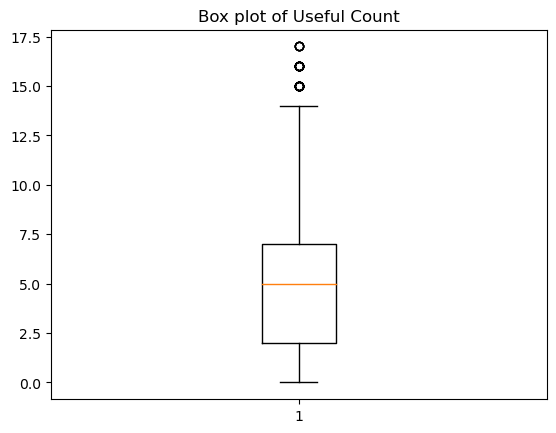

In [85]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')

Text(0.5, 1.0, 'Box plot of Ease Of Use')

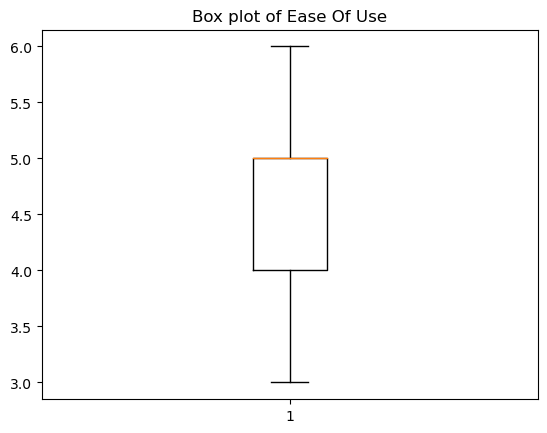

In [86]:
plt.boxplot(data_new["EaseofUse"])
plt.title('Box plot of Ease Of Use')

# Satisfaction column

In [87]:
data_new['Satisfaction'].value_counts()

5.0    557
4.0    337
1.0    314
3.0    233
2.0    131
6.0      1
Name: Satisfaction, dtype: int64

In [88]:
data_new[data_new['Satisfaction'] > 5]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
195282,35-44,migraine prevention,5/18/2009,topamax,14494.0,6.0,6.0,ahoj som zo slovenska dlhe roky mam migreny tu...,6.0,Female,tiredness drowsiness dizziness loss coordinati...,0.0


Deleting values greater than 5 from Satisfaction column

In [89]:
data_new.drop(labels = data_new[data_new['Satisfaction'] == 6].index, axis = 0, inplace = True)
data_new[data_new['Satisfaction'] == 6]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


# 7. Feature engineering

Creation of a new SideEffects column

In [90]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [91]:
data_new['SideEffects']=data1

Since DrugId is the same, dropping the column

In [92]:
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

In [93]:
data_new.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
191610,7-12,simple partial seizures,2/26/2019,topamax,4.0,5.0,"I'm 30 years old, I 12 I put medication. When ...",Male,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191638,65-74,migraine prevention,6/22/2014,topamax,5.0,5.0,I taking Topamax exactly four years migraine p...,Female,tiredness drowsiness dizziness loss coordinati...,9.0,Extreme
191645,55-64,other,12/27/2018,topamax,5.0,5.0,I suffer spinal degeneration I supposed daily ...,Female,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191652,45-54,migraine prevention,12/17/2018,topamax,5.0,3.0,I taking 50 mg 2x day since 11/30/18. The firs...,Female,tiredness drowsiness dizziness loss coordinati...,7.0,Mild
191659,25-34,tonic clonic epilepsy,10/18/2018,topamax,5.0,5.0,The important thin I want say Topamax medicine...,Male,tiredness drowsiness dizziness loss coordinati...,1.0,Extreme


In [94]:
data_copy = data_new.copy()

In [96]:
data_new=data_new.drop(columns = ['Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,7-12,simple partial seizures,4.0,5.0,Male,Extreme
1,65-74,migraine prevention,5.0,5.0,Female,Extreme
2,55-64,other,5.0,5.0,Female,Extreme
3,45-54,migraine prevention,5.0,3.0,Female,Mild
4,25-34,tonic clonic epilepsy,5.0,5.0,Male,Extreme


In [97]:
data_new.shape

(1572, 6)

# Encoding

In [98]:
#Finding categorical columns and changing datatype
for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            1572 non-null   category
 1   Condition      1572 non-null   category
 2   EaseofUse      1572 non-null   float64 
 3   Effectiveness  1572 non-null   float64 
 4   Sex            1572 non-null   category
 5   SideEffects    1572 non-null   category
dtypes: category(4), float64(2)
memory usage: 31.9 KB


In [99]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [100]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            1572 non-null   category
 1   Condition      1572 non-null   category
 2   EaseofUse      1572 non-null   float64 
 3   Effectiveness  1572 non-null   float64 
 4   Sex            1572 non-null   category
 5   SideEffects    1572 non-null   category
dtypes: category(4), float64(2)
memory usage: 31.9 KB


In [101]:
data_new.columns

Index(['Age', 'Condition', 'EaseofUse', 'Effectiveness', 'Sex', 'SideEffects'], dtype='object')

In [102]:
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,7-12,simple partial seizures,4.0,5.0,Male,Extreme
1,65-74,migraine prevention,5.0,5.0,Female,Extreme
2,55-64,other,5.0,5.0,Female,Extreme
3,45-54,migraine prevention,5.0,3.0,Female,Mild
4,25-34,tonic clonic epilepsy,5.0,5.0,Male,Extreme


In [104]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Age','Sex','Condition','SideEffects']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [106]:
data_new.head()

,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,9,10,4.0,5.0,1,0
1,8,8,5.0,5.0,0,0
2,7,9,5.0,5.0,0,0
3,6,8,5.0,3.0,0,1
4,3,11,5.0,5.0,1,0


In [107]:
data_new.shape

(1572, 6)

# Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse']
data_new[scale] = ss.fit_transform(data_new[scale])

In [109]:
data_new.shape

(1572, 6)

In [110]:
data_model=data_new.copy()

# Splitting the data

In [111]:
#target
y = data_new['SideEffects']

In [112]:
X = data_new.drop(['SideEffects'],axis=1)

In [113]:
X.shape

(1572, 5)

# Splitting the dataset into train and test sets

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [115]:
X_train.shape

(1257, 5)

In [116]:
X_test.shape

(315, 5)

In [117]:
y_train.shape

(1257,)

In [118]:
y_test.shape

(315,)

# Modeling

# Logistic Regression Model

In [119]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

# Performance Evaluation

In [121]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  60.63492063492063


# Confusion Matrix of Logistic Regression Model

In [122]:
confusion_matrix(y_test,y_pred)

array([[101,   0,   0,   0,  15],
       [  0,   0,   1,  14,   9],
       [  5,   0,   8,   5,  25],
       [  5,   0,   4,  48,  11],
       [ 19,   0,   4,   7,  34]], dtype=int64)

# kNN Model

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
acc_values = []
neighbors = np.arange(3,15)

# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    #no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [125]:
acc_values

[0.49206349206349204,
 0.5682539682539682,
 0.580952380952381,
 0.5936507936507937,
 0.6031746031746031,
 0.5841269841269842,
 0.5968253968253968,
 0.5777777777777777,
 0.5841269841269842,
 0.5714285714285714,
 0.5746031746031746,
 0.5841269841269842]

To find which k value got the highest accuracy, plotted a graph between neighbor values (i.e. k values) and accuracy values

Text(0, 0.5, 'accuracy')

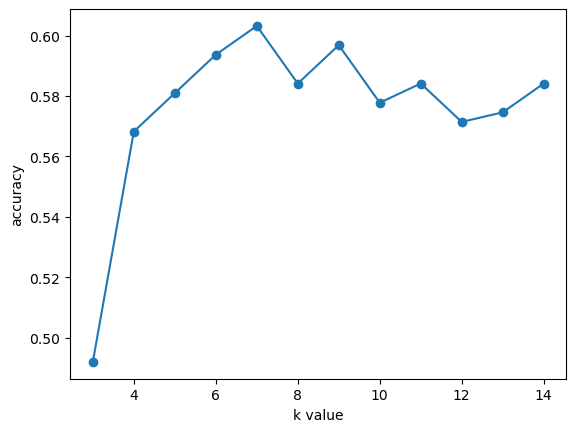

In [126]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

KNN model with k=14

In [127]:
classifier = KNeighborsClassifier(n_neighbors= 14, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Performance Evaluation

In [129]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  58.41269841269842


Confusion Matrix for KNN Classifier

In [130]:
confusion_matrix(y_test,y_pred)

array([[103,   0,   1,   0,  12],
       [  1,   5,   3,   8,   7],
       [  9,   2,  10,   1,  21],
       [  5,   4,   5,  41,  13],
       [ 27,   2,   9,   1,  25]], dtype=int64)

# Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

# Performance Evaluation

In [132]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  61.26984126984127


Confusion Matrix of Decision Tree Model

In [133]:
confusion_matrix(y_test,y_pred)

array([[98,  0,  2,  1, 15],
       [ 0,  6,  2,  9,  7],
       [ 8,  2, 16,  1, 16],
       [ 6, 11,  6, 41,  4],
       [21,  1,  5,  5, 32]], dtype=int64)

# Support Vector Machine

Linear SVM

In [134]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

Performance Evaluation

In [135]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  60.63492063492063


Confusion Matrix of Linear SVM Model

In [136]:
confusion_matrix(y_test,y_pred)

array([[99,  0,  0,  0, 17],
       [ 0,  0,  6, 11,  7],
       [ 6,  0, 14,  0, 23],
       [ 5,  0, 11, 44,  8],
       [20,  0,  9,  1, 34]], dtype=int64)

Polynomial SVM

In [137]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

Performance Evaluation

In [138]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  60.0


Confusion Matrix of Polynomial SVM

In [139]:
confusion_matrix(y_test,y_pred)

array([[99,  0,  0,  0, 17],
       [ 0,  0,  6, 10,  8],
       [ 6,  0, 11,  0, 26],
       [ 7,  0, 10, 41, 10],
       [20,  0,  6,  0, 38]], dtype=int64)

Radial SVM

In [140]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

Performance Evaluation

In [141]:

print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  56.507936507936506


Confusion Matrix

In [142]:
confusion_matrix(y_test,y_pred)

array([[100,   0,   0,   0,  16],
       [  1,   0,   4,  11,   8],
       [  8,   0,   4,   0,  31],
       [  5,   0,   4,  44,  15],
       [ 30,   0,   3,   1,  30]], dtype=int64)

# Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

Performance Evaluation 

In [144]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  60.63492063492063


Confusion Matrix

In [145]:
confusion_matrix(y_test,y_pred)

array([[98,  0,  2,  1, 15],
       [ 0,  5,  2, 10,  7],
       [ 7,  2, 13,  1, 20],
       [ 5,  6,  8, 42,  7],
       [19,  3,  5,  4, 33]], dtype=int64)

# Feature Importance

In [146]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

Effectiveness    51.362956
Age              19.849071
Condition        14.074761
EaseofUse        11.739535
Sex               2.973677
dtype: float64

# Fine tuning of hyper parameters

In [147]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [148]:
# creating another instance of random forest classifier with some changes in hyperparameter
rft= RandomForestClassifier(bootstrap=True, n_estimators=1000,max_depth=8,random_state =42,criterion='entropy')

In [150]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=42)

In [151]:
y_pred=rft.predict(X_test)

In [152]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  60.952380952380956


# Gradient Boosting

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

Performance Evaluation

In [154]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  58.41269841269842


Confusion Matrix

In [155]:
confusion_matrix(y_test,y_pred)

array([[99,  0,  1,  0, 16],
       [ 0,  4,  5,  7,  8],
       [ 5,  0, 14,  2, 22],
       [ 4,  7, 13, 36,  8],
       [19,  3,  9,  2, 31]], dtype=int64)

# Extreme Gradient Boosting

In [157]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [158]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

Performance Evaluation

In [159]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  61.26984126984127


Confusion matrix

In [160]:
confusion_matrix(y_test,y_pred)

array([[98,  0,  2,  1, 15],
       [ 0,  6,  1,  9,  8],
       [ 7,  0, 13,  2, 21],
       [ 5,  7,  8, 40,  8],
       [18,  2,  5,  3, 36]], dtype=int64)

Inference
Accuracies of classification models:

Logistic Regression - 60.634%

KNN Model - 58.412%

Decision Tree Classifier - 61.269%

Support Vector Machine:

Linear SVM - 60.634%

Polynomial SVM - 60.0%

Radial SVM - 56.507%

Random Forest - 60.634%

Fine-tuning Random Forest - 60.952%

Gradient Boosting - 58.412%

Extreme Gradient Boosting - 61.269%

Recommendations
Based on the derived EDAs, the following are recommended with regard to the use of Topamax:

The drug is safe for use by those up to 24 years (maximum nil side effects)

Females in general are better to use the drug under a physician’s guidance given the high chances of extremely severe side effects.

Conclusion
Performed various pre-processing steps and obtained a clean dataset for exploratory data analysis and modelling. Various visualisations were done on the dataset and selected a particular drug Topamax. Maximum users consume this drug for migraine prevention.

The best classification model was obtained by Decision Tree Classifier and Extreme Gradient Boosting. On performance evaluation, maximum accuracy of 61.269% has been achieved.

Domination of female users were consistent across age groups above 12 and below 75 years. Also, people in the age groups 35 to 44, 45 to 54 and 25 to 34 accounted for maximum usage of Topamax. Most users found Topamax as highly effective, especially females. Most rated it highly for its ease of use as well. Genderwise, side effects proved extreme in females.